# Decision Tree: ต้นไม้สำหรับใช้ในการตัดสินใจ
Shoes and Ages

เพื่อให้เกิดความง่ายในการทำความเข้าใจ **ผมจะขอเรียก DataFrame ว่าตาราง (Table)**

In [1]:
import pandas as pd

# สร้างตารางที่จัดเก็บข้อมูลการซื้อรองเท้าของลูกค้าตามคุณลักษณะ (Features) ประกอบด้วย
# เพศ (sex), อายุ (age), ชนิดของรองเท้า (target)
data = pd.DataFrame({             
    'sex':['male', 'female', 'male', 'male', 'female', 'male','female'],
    'age':[30, 17, 25, 18, 19, 35, 30],
    'target':['oxfords', 'sneakers', 'oxfords', 'sneakers', 'sneakers', 'oxfords', 'high-heels']
})

data

,sex,age,target
0,male,30,oxfords
1,female,17,sneakers
2,male,25,oxfords
3,male,18,sneakers
4,female,19,sneakers
5,male,35,oxfords
6,female,30,high-heels


## Data Preparation: Label Encoding
ทำการแปลงข้อมูล Categorical Data -> ตัวเลข


1.   นำเข้า Library sklearn.preprocessing
2.   เตรียมเครื่องมือสำหรับแปลงตัวอักษร เป็น ตัวเลข
3.   เลือกแปลง คอลัมน์ 'sex' ให้เป็นตัวเลข แล้วเก็บลงที่ data
4.   เลือกแปลง คอลัมน์ 'target' เป้าหมาย ให้เป็นตัวเลขแล้วเก็บของที่ data



In [2]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data

,sex,age,target
0,1,30,oxfords
1,0,17,sneakers
2,1,25,oxfords
3,1,18,sneakers
4,0,19,sneakers
5,1,35,oxfords
6,0,30,high-heels


In [3]:
label_encoder.classes_

array(['female', 'male'], dtype=object)

In [4]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])
data

,sex,age,target
0,1,30,1
1,0,17,2
2,1,25,1
3,1,18,2
4,0,19,2
5,1,35,1
6,0,30,0


In [5]:
label_encoder.classes_

array(['high-heels', 'oxfords', 'sneakers'], dtype=object)

## Dataset 
**ข้อมูลที่สามารถนำไปใช้ได้กับ Machine Learning ส่วนใหญ่จะต้องถูกเข้ารหัส (Encoding) ให้เป็นตัวเลขก่อน** 

In [6]:
import pandas as pd

# สร้างตารางที่จัดเก็บข้อมูลการซื้อรองเท้าของลูกค้าตามคุณลักษณะ (Features) ประกอบด้วย
# เพศ (sex), อายุ (age), ชนิดของรองเท้า (target)
data = pd.DataFrame({             
    'sex':[1, 0, 1, 1, 0, 1, 0],                # {'female': 0}, {'male': 1} 
    'age':[30, 17, 25, 18, 19, 35, 30],
    'target':[1, 2, 1, 2, 2, 1, 0]              # {'high-heels': 0}, {'oxfords': 1}, {'sneakers': 2}

    #'sex':['male', 'female', 'male', 'male', 'female', 'male','female'],
    #'age':[30, 17, 25, 18, 19, 35, 30],
    #'target':['oxfords', 'sneakers', 'oxfords', 'sneakers', 'sneakers', 'oxfords', 'high-heels']
})

data

,sex,age,target
0,1,30,1
1,0,17,2
2,1,25,1
3,1,18,2
4,0,19,2
5,1,35,1
6,0,30,0


## การแสดงข้อมูลที่จัดเก็บใน ตาราง (Preview Table)


In [7]:
# แสดงผลข้อมูล 5 แถวแรกในตาราง (Table)
data.head()


,sex,age,target
0,1,30,1
1,0,17,2
2,1,25,1
3,1,18,2
4,0,19,2


In [8]:
# แสดงผลข้อมูล 5 แถวสุดท้ายในตาราง (Table)
data.tail(3)

,sex,age,target
4,0,19,2
5,1,35,1
6,0,30,0


## การแสดงข้อมูลคุณลักษณะของข้อมูลที่จัดเก็บในตาราง (Table Information)

In [9]:
# แสดงจำนวนแถว และคอลัมน์ในตาราง (Rows, Columns)
data.shape

(7, 3)

In [10]:
# ------------------------------------------------------------------------------------------
# - แสดงข้อมูลของ คุณลักษณะ (Features) ประกอบด้วย
# - จำนวนแถว (RangeIndex)
# - จำนวนคอลัมน์ (Data columns)
# - ลำดับที่ (#) ชื่อคอลัมน์ (Column) จำนวนแถวที่ข้อมูลไม่เป็นค่าว่าง (Non-Null Count) ชนิดของข้อมูล (Dtype)
# - พื้นที่ในหน่วยความจำ (memory usage)
# ------------------------------------------------------------------------------------------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sex     7 non-null      int64
 1   age     7 non-null      int64
 2   target  7 non-null      int64
dtypes: int64(3)
memory usage: 296.0 bytes


In [11]:
# แสดงค่าสถิติเชิงบรรยายของคอลัมน์ที่สามารถคำนวณได้ (มีชนิดเป็นตัวเลข: int, float) 
# เพื่อดูการกระจายตัวของชุดข้อมูล โดยไม่นับรวมค่า NaN หรือ Missing Data
data.describe()

,sex,age,target
count,7.000000,7.000000,7.000000
mean,0.571429,24.857143,1.285714
std,0.534522,7.057586,0.755929
min,0.000000,17.000000,0.000000
25%,0.000000,18.500000,1.000000
50%,1.000000,25.000000,1.000000
75%,1.000000,30.000000,2.000000
max,1.000000,35.000000,2.000000


### แสดงข้อมูลที่จัดเก็บในแต่ละคอลัมน์แบบไม่ซ้ำ (Unique)

In [12]:
# อยากทราบว่ามีเพศอยู่กี่แบบ?
data['sex'].unique()

array([1, 0])

In [13]:
# อยากทราบว่าลูกค้ามีอายุอยู่กี่แบบ? 
data['age'].unique()

array([30, 17, 25, 18, 19, 35])

In [14]:
# อยากทราบว่ามีรองเท้าอยู่กี่แบบ?
data['target'].unique()

array([1, 2, 0])

## การกรองเพื่อดูข้อมูลที่เราสนใจ (Filtering)

In [15]:
# แสดงข้อมูลทุกแถวที่ลูกค้าเป็นเพศชาย (sex == 1)
data.loc[data['sex'] == 1]

,sex,age,target
0,1,30,1
2,1,25,1
3,1,18,2
5,1,35,1


In [16]:
# แสดงข้อมูลทุกแถวที่ลูกค้ามีอายุ (age) มากกว่าหรือเท่ากับ (>=) 20 ปี
data.loc[data['age'] >= 20]

,sex,age,target
0,1,30,1
2,1,25,1
5,1,35,1
6,0,30,0


In [24]:
# แสดงข้อมูลทุกแถวที่ลูกค้ามีอายุ (age) มากกว่าหรือเท่ากับ (>=) 20 ปี และ (&) เป็นเพศ (sex) ชาย (1)
data.loc[(data['age'] >= 20) & (data['sex'] == 1)]

,sex,age,target
0,1,30,1
2,1,25,1
5,1,35,1


In [25]:
# แสดงข้อมูลทุกแถวที่ลูกค้าใส่รองเท้าผ้าใบ (target == 2)
data.loc[data['target'] == 2]

,sex,age,target
1,0,17,2
3,1,18,2
4,0,19,2


In [26]:
data

,sex,age,target
0,1,30,1
1,0,17,2
2,1,25,1
3,1,18,2
4,0,19,2
5,1,35,1
6,0,30,0


## เลือกคุณสมบัติ (features) ที่จะใช้ในการตัดสินใจ และคำตอบ (target / label / class)

เราจะแปลงข้อมูลให้อยู่ในรูปของ numpy.array เนื่องจาก scikit-learn จะใช้ข้อมูลในรูปแบบของ array 2 มิติ (ตาราง / DataFrame)

In [31]:
import numpy as np
# เตรียมลักษณะ array 2D
# ใช้คอลัมน์เพศ (sex) และอายุ (age) ในการจำแนก (Classify) ประเภทของรองเท้าที่ลูกค้าเลือก
feature_name = ['sex', 'age']

# ใช้คอลัมน์รองเท้า (target) เป็นคำตอบ (label / answer) 
target_name = 'target'

# สร้างอาร์เรย์ (ตารางในรูปแบบที่จะนำไปสอนให้คอมพิวเตอร์ได้เรียนรู้) เพื่อจัดเก็บเฉพาะคอลัมน์ที่จะใช้ในการสอน (Training)
features = np.array(data[feature_name])

# สร้างอาร์เรย์ ของเป้าหมาย (target) แยกตามคลาส (Class) ที่เป็นคำตอบ (label / answer)
target = np.array(data[target_name])

In [30]:
# ข้อมูลก่อนที่จะแปลงให้อยู่ในรูปของ อาร์เรย์
data

,sex,age,target
0,1,30,1
1,0,17,2
2,1,25,1
3,1,18,2
4,0,19,2
5,1,35,1
6,0,30,0


In [32]:
#อาร์เรย์ (ตารางในรูปแบบที่จะนำไปสอนให้คอมพิวเตอร์ได้เรียนรู้)
features

array([[ 1, 30],
       [ 0, 17],
       [ 1, 25],
       [ 1, 18],
       [ 0, 19],
       [ 1, 35],
       [ 0, 30]])

In [33]:
#อาร์เรย์ (ตารางคำตอบในรูปแบบที่จะนำไปสอนให้คอมพิวเตอร์ได้เรียนรู้)
target

array([1, 2, 1, 2, 2, 1, 0])

## สร้าง Decision Tree Classifier เพื่อสร้างแบบจำลองต้นไม้สำหรับการจำแนก ประเภทของรองเท้า (Shoes)

In [34]:
# import Decision Tree Classifier มาจาก sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# สร้างแบบจำลองต้นไม้เพื่อจำแนกประเภทของรองเท้า
model = DecisionTreeClassifier()


# นำข้อมูลมาให้ แบบจำลอง เรียนรู้
model.fit(features, target)

# คำนวณคะแนน ความถูกต้องของโมเดล
model.score(features, target)

1.0

## Data Visualization

In [35]:
# ปิดการใช้งานแจ้งเตือนทั้งหมด (Suppress All Warning in Python)
import warnings

warnings.filterwarnings('ignore')

### แสดงแผนภาพประกอบการตัดสินใจ

In [36]:
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

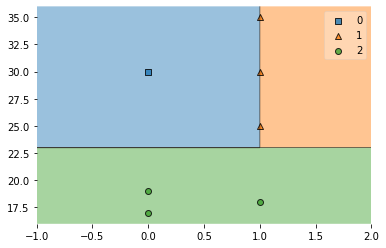

In [39]:
fig = plot_decision_regions(X=features, y=target, clf=model)

### แสดงต้นไม้ตัดสินใจ (Decision Tree)

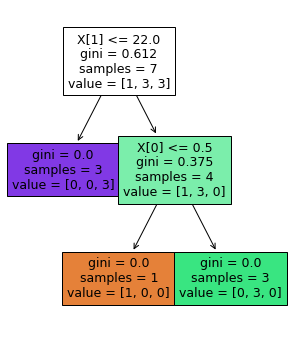

In [42]:
from sklearn import tree
plt.figure(figsize=(5,6))

tree.plot_tree(model, filled=True);

In [44]:
tree_result = tree.export_text(model)

print(tree_result)

|--- feature_1 <= 22.00
|   |--- class: 2
|--- feature_1 >  22.00
|   |--- feature_0 <= 0.50
|   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 1



In [47]:
tree_result = tree.export_text(model, feature_names=['sex','age'])

print(tree_result)

|--- age <= 22.00
|   |--- class: 2
|--- age >  22.00
|   |--- sex <= 0.50
|   |   |--- class: 0
|   |--- sex >  0.50
|   |   |--- class: 1



## บันทึกแบบจำลองเพื่อเอาไว้ใช้งานในภายหลัง

In [49]:
import pickle

file_name = 'shoes_model.png'               # ชื่อแฟ้มข้อมูลสำหรับบันทึกแบบจำลอง
pickle.dump(model, open(file_name, 'wb'))   # บันทึกลงแฟ้มข้อมูล

## โหลดแบบจำลองที่บันทึกเอาไว้มาใช้งาน โดยไม่ต้อง Train ใหม่

In [ ]:
load_model = pickle.load(open(file_name, 'rb'))   # อ่านแบบจำลองที่บันทึกไว้ก่อนหน้า
result = load_model.score(features, target)       # คำนวณ

print(result)

1.0


## ตัวอย่างการประยุกต์ใช้ Decision Tree กับปัญหาที่มีความซับซ้อนมากขึ้น

### เตรียมข้อมูล


1.   โหลดข้อมูลดอก Iris จาก datasets ที่มาพร้อมกับ sklearn
2.   เตรียมแบบจำลองต้นไม้เพื่อการตัดสินใจ Decision Tree Classifier
3.   แสดง keys() (ชื่อของคอลัมน์) ที่เก็บใน Iris ที่เราสามารถนำมาใช้งานได้
4.   แสดง 'data' และ 'features_names' ของ Iris



In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()

iris



In [54]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [57]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [58]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [59]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### สร้าง DataFrame ชื่อ data เพื่อให้ง่ายต่อการทำความเข้าใจข้อมูล Iris


1.   เก็บ data ของ: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
2.   เก็บ data ของ: 'target' 
3.   แสดงข้อมูลใน data (5 อันดับแรก)



In [70]:
import pandas as pd

data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Visualization: Iris


1.   นำเข้า Library seaborn และ matplotlib.pyplot
2.   เซต (set) ค่าให้กราฟแสดงด้วยความสามารถของ seaborn
3.   แสดงกราฟ seaborn แบบ pairplot โดยส่ง data เข้าไป

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns



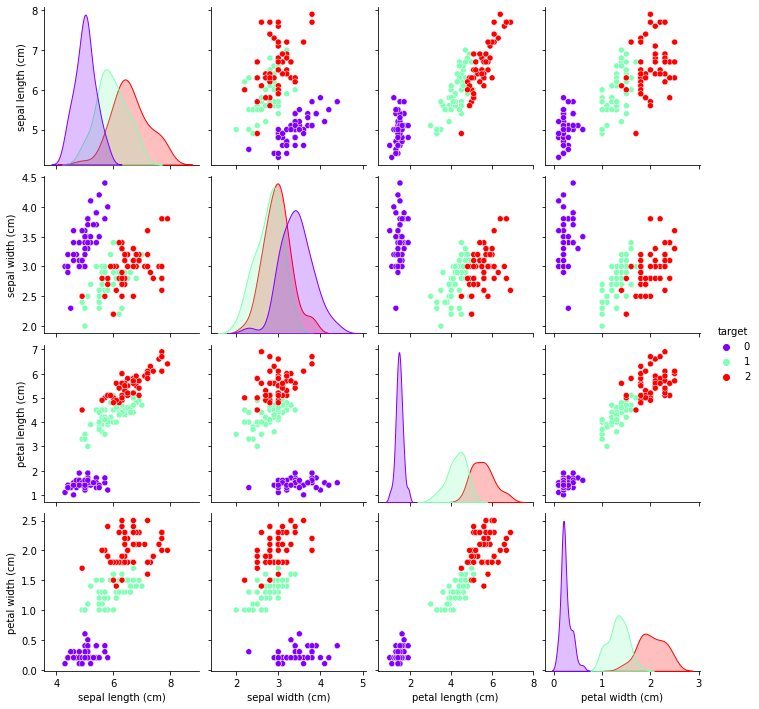

In [72]:
sns.pairplot(data, hue='target', palette='rainbow');

### สร้างแบบจำลองจากข้อมูลที่กำหนดไว้


1.   เลือก features ที่เราต้องการนำมาใช้
2.   ระบุ target
3.   สร้างแบบจำลองต้นไม้ Decision Tree Classifier โดยระบุความลึกของต้นไม้ (max_depth = 2)
4.   Train ด้วย features และ target ที่เราเตรียมไว้
5.   คำนวณคะแนน (score) โดยใช้ features และ target




In [74]:
features = iris['data']
target = iris['target']

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(features, target)
model.score(features, target)

1.0

### สร้างกราฟต้นไม้
1. สร้างกราฟต้นไม้ แล้วแสดงผลเป็นรูปภาพ
2. ปรับขนาดของกราฟด้วย matplotlib.pyplot และแสดงผลให้อ่านเข้าใจมากขึ้น โดยการระบุ feature_names และ class_names ที่ใช้
3. สร้างกราฟต้นไม้ แล้วแสดงผลเป็นข้อความ (text)
4. สร้างกราฟต้นไม้ แล้วแสดงผลเป็นข้อความ (text) พร้อม รายชื่อของ feature_name

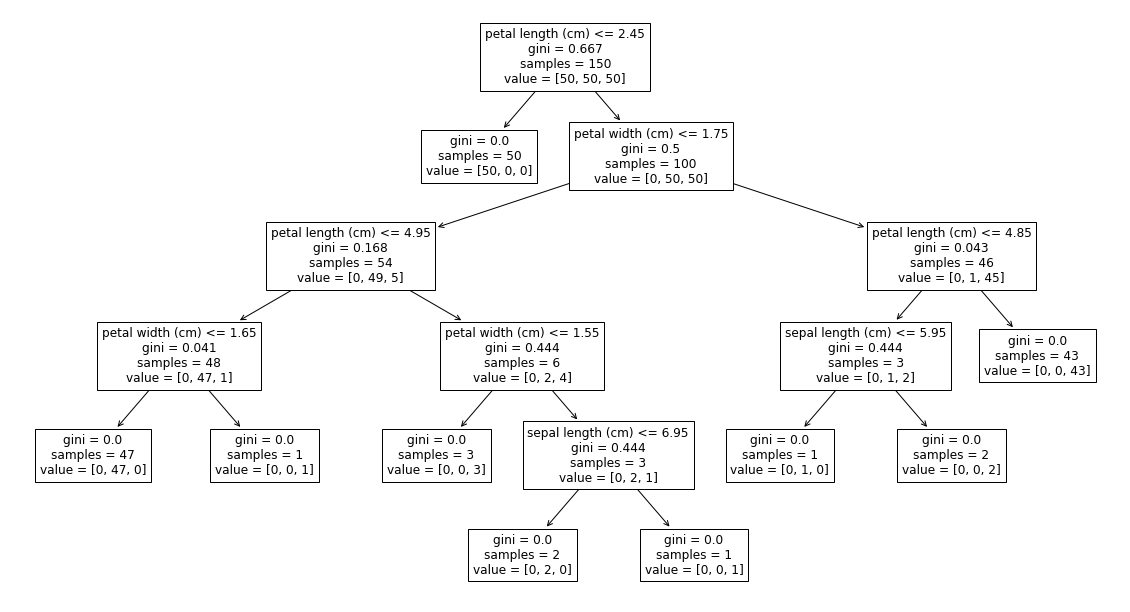

In [87]:
from sklearn import tree
plt.figure(figsize=(20,11))

tree.plot_tree(model, feature_names=iris['feature_names']);

In [83]:
tree_result = tree.export_text(model, feature_names=iris['feature_names'])
print(tree_result)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2

